In [68]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
# Read in the words
words = open('/Users/rajesh/Documents/Datasets/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [70]:
len(words)

32033

In [71]:
# Build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [72]:
# Build the dataset

block_size = 3     # Context Length: How many previous characters do we use to predict the next one?
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
        print(''.join(itos[i] for i in context), '----->', itos[idx])
        context = context[1:] + [idx]     # Crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... -----> e
..e -----> m
.em -----> m
emm -----> a
mma -----> .
olivia
... -----> o
..o -----> l
.ol -----> i
oli -----> v
liv -----> i
ivi -----> a
via -----> .
ava
... -----> a
..a -----> v
.av -----> a
ava -----> .
isabella
... -----> i
..i -----> s
.is -----> a
isa -----> b
sab -----> e
abe -----> l
bel -----> l
ell -----> a
lla -----> .
sophia
... -----> s
..s -----> o
.so -----> p
sop -----> h
oph -----> i
phi -----> a
hia -----> .


In [73]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [74]:
# Embedding logup table
C = torch.randn((27,2))

In [75]:
C[5]

tensor([ 0.4387, -0.2710])

In [76]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [77]:
# Multiply the one hot encoding vector with the columns of C

F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.4387, -0.2710])

In [78]:
# Get multiple elements
# Note that the index 7 is repeated multiple times and will be retrieved as many times
C[torch.tensor([5,6,7,7,7,7])]

tensor([[ 0.4387, -0.2710],
        [ 1.7078, -0.8006],
        [ 0.1909,  0.0514],
        [ 0.1909,  0.0514],
        [ 0.1909,  0.0514],
        [ 0.1909,  0.0514]])

In [79]:
C[X].shape

torch.Size([32, 3, 2])

In [80]:
# Using pytorch indexing we create our embedding as follows
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [81]:
# Construct the hidden layer
# We have 3 embeddings each of which is 2 dimensional - 6 inputs
# Assume 100 neurons in the hidden layer
# b is bias

W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [82]:
# We want to multiply the embeddings by the weight
# However, the below gives an error because the embeddings have not been concatenated
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [83]:
# Note that the emb is a tensor of size 32, 3, 2
# This results in a 32 x 6 tensor by concatenating the 3 embeddings
torch.cat([emb[:, 0, :], emb[:, 1, :], emb [:, 2, :]], 1)

tensor([[-0.5836,  0.9777, -0.5836,  0.9777, -0.5836,  0.9777],
        [-0.5836,  0.9777, -0.5836,  0.9777,  0.4387, -0.2710],
        [-0.5836,  0.9777,  0.4387, -0.2710, -0.2683,  0.9635],
        [ 0.4387, -0.2710, -0.2683,  0.9635, -0.2683,  0.9635],
        [-0.2683,  0.9635, -0.2683,  0.9635, -0.5703,  0.0823],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5836,  0.9777],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5827,  0.8082],
        [-0.5836,  0.9777, -0.5827,  0.8082,  0.6405, -0.9243],
        [-0.5827,  0.8082,  0.6405, -0.9243, -0.1869,  0.5661],
        [ 0.6405, -0.9243, -0.1869,  0.5661, -1.0030, -1.0809],
        [-0.1869,  0.5661, -1.0030, -1.0809, -0.1869,  0.5661],
        [-1.0030, -1.0809, -0.1869,  0.5661, -0.5703,  0.0823],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5836,  0.9777],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5703,  0.0823],
        [-0.5836,  0.9777, -0.5703,  0.0823, -1.0030, -1.0809],
        [-0.5703,  0.0823, -1.0030, -1.0

In [84]:
# Use torch.unbind to remove a tensor dimension
torch.unbind(emb, 1)

(tensor([[-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [ 0.4387, -0.2710],
         [-0.2683,  0.9635],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.5827,  0.8082],
         [ 0.6405, -0.9243],
         [-0.1869,  0.5661],
         [-1.0030, -1.0809],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.5703,  0.0823],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.1869,  0.5661],
         [ 1.6190,  0.3139],
         [-0.5703,  0.0823],
         [-0.3288,  0.3682],
         [ 0.4387, -0.2710],
         [ 0.6405, -0.9243],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [ 1.6190,  0.3139],
         [-0.5827,  0.8082],
         [-1.0513, -1.0993],
         [ 1.6253, -1.8624]]),
 tensor([[-0.5836,  0.9777],
         [-0.5836,  0.9777],
         [ 0

In [85]:
# Note that the Pytorch concatenation creates a whole new tensor that uses new memory

torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [86]:
# Torch views are more efficient ways of concatenating the data
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [87]:
# The above torch vector can be represented as different sized tensors
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [88]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [89]:
# Storage is always a 1-D vector in memory
a.storage()

# Reference: log.ezyang.com (PyTorch internals)

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [90]:
emb.shape

torch.Size([32, 3, 2])

In [91]:
emb.view(32,6)

tensor([[-0.5836,  0.9777, -0.5836,  0.9777, -0.5836,  0.9777],
        [-0.5836,  0.9777, -0.5836,  0.9777,  0.4387, -0.2710],
        [-0.5836,  0.9777,  0.4387, -0.2710, -0.2683,  0.9635],
        [ 0.4387, -0.2710, -0.2683,  0.9635, -0.2683,  0.9635],
        [-0.2683,  0.9635, -0.2683,  0.9635, -0.5703,  0.0823],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5836,  0.9777],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5827,  0.8082],
        [-0.5836,  0.9777, -0.5827,  0.8082,  0.6405, -0.9243],
        [-0.5827,  0.8082,  0.6405, -0.9243, -0.1869,  0.5661],
        [ 0.6405, -0.9243, -0.1869,  0.5661, -1.0030, -1.0809],
        [-0.1869,  0.5661, -1.0030, -1.0809, -0.1869,  0.5661],
        [-1.0030, -1.0809, -0.1869,  0.5661, -0.5703,  0.0823],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5836,  0.9777],
        [-0.5836,  0.9777, -0.5836,  0.9777, -0.5703,  0.0823],
        [-0.5836,  0.9777, -0.5703,  0.0823, -1.0030, -1.0809],
        [-0.5703,  0.0823, -1.0030, -1.0

In [92]:
# Elementwise equality comparison
emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [93]:
# Back to the hidden layer

# Note that the -1 is interpreted by Pytorch as the remaining number of elements
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

# Note that + b1 is using broadcasting.
# (emb.view(-1, 6) @ W1).shape = torch.Size([32,100])
# b1.shape = torch.Size([100])
# Broadcasting will align from the right and create a fake dimension (32)
# 32, 100
# 1, 100

In [94]:
h

tensor([[ 0.2179,  0.6076, -0.8224,  ...,  0.9640,  0.9964,  0.2710],
        [-0.8506,  0.9931, -0.9594,  ..., -0.4802,  0.9993, -0.5827],
        [ 0.9535, -0.0285, -0.7610,  ...,  0.9945, -0.0939,  0.8574],
        ...,
        [-0.9952,  0.9996, -0.9981,  ..., -0.9172,  0.5670, -0.9992],
        [ 0.9973, -0.7297, -0.9035,  ..., -0.9981, -1.0000, -0.4414],
        [-0.3364,  0.9741,  0.6762,  ..., -1.0000, -0.9940, -0.9997]])

In [95]:
# Hidden layer activations for every one of our 32 examples
h.shape

torch.Size([32, 100])

In [96]:
# Create the output layer
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [97]:
logits = h @ W2 + b2

In [98]:
logits.shape

torch.Size([32, 27])

In [99]:
counts = logits.exp()

In [100]:
prob = counts / counts.sum(1, keepdims=True)

In [101]:
prob.shape

torch.Size([32, 27])

In [102]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [103]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [104]:
# Extract the probabilities of the expected output (Y)
prob[torch.arange(32), Y]

tensor([2.1851e-09, 3.1939e-08, 1.4072e-06, 1.0365e-06, 2.1421e-11, 3.3930e-01,
        8.8920e-11, 3.3472e-17, 1.0024e-13, 1.1718e-08, 3.8477e-05, 8.0696e-07,
        9.9805e-04, 3.4435e-08, 2.3659e-08, 9.0220e-01, 2.5796e-07, 4.6586e-01,
        4.1221e-12, 3.6596e-10, 4.4962e-08, 1.1978e-05, 1.7719e-01, 4.0103e-15,
        3.8697e-10, 5.3956e-01, 4.8609e-13, 2.3115e-11, 1.3415e-03, 2.1470e-17,
        7.2307e-08, 7.7514e-16])

In [105]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.6155)

In [106]:
# Putting it all together

In [107]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [108]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [109]:
sum(p.nelement() for p in parameters) # Total number of parameters in the network

3481

In [110]:
emb = C[X] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [111]:
# The loss calculation is encapsulated in the Functional.cross_entropy function
# We get the exact same loss as above
F.cross_entropy(logits,Y)

tensor(17.7697)

In [112]:
# F.cross_entropy is more computationally efficient as it doesn't create new intermediate tensors
# F.cross_entropy is numerically well behaved.
logits = torch.tensor([-2, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])

In [113]:
# Large positive numbers can result in out of range (or NaN)
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0., 0., 0., nan])

In [114]:
# Cross Entropy calculation subtracts the largest positive number to keep the numeric calculation well behaved.

In [115]:
logits = torch.tensor([-5, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [116]:
# Subtract the largest positive number

In [117]:
# The result is the same
logits = torch.tensor([-5, -3, 0, 5]) - 5
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [118]:
for p in parameters:
    p.requires_grad = True

In [119]:
# Set up training of the neural network
# Learning rate eta
eta = 0.1

for _ in range(100):

    # Forward pass
    emb = C[X] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

print(loss.item())


0.3367387652397156


In [120]:
# Print the max of logits along the first dimension
# Pytorch prints the max values and also the indices that can be compared with Y
logits.max(1)

torch.return_types.max(
values=tensor([11.3379, 13.0894, 18.9434, 17.5786, 12.7205, 11.3379, 13.0234, 11.5993,
        13.5442, 15.5540, 12.5548, 17.6663, 11.3379, 12.6919, 13.9530, 17.0410,
        11.3379, 13.8052, 11.4075, 13.1371, 15.8441, 12.1391,  7.9167,  7.8798,
        13.8773, 11.3379, 13.0983, 13.6820, 11.2885, 14.2338, 15.6165, 12.0455],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 13, 13,  1,  0,  1, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  1, 19,
         1,  2,  5, 12, 12,  1,  0,  1, 15, 16,  8,  9,  1,  0]))

In [121]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [122]:
# Read the full data set and optimize the neural network

# Build the dataset

block_size = 3     # Context Length: How many previous characters do we use to predict the next one?
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
        # print(''.join(itos[i] for i in context), '----->', itos[idx])
        context = context[1:] + [idx]     # Crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [123]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [124]:
# Intialize the network
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [125]:
sum(p.nelement() for p in parameters)

3481

In [126]:
for p in parameters:
    p.requires_grad = True

In [127]:
# Set up training of the neural network
# Learning rate eta
eta = 0.1

for _ in range(10):

    # Forward pass
    emb = C[X] #(228146, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

# print(loss.item())

19.505229949951172
17.08448600769043
15.776531219482422
14.833340644836426
14.002605438232422
13.253263473510742
12.579920768737793
11.983102798461914
11.470495223999023
11.05185604095459


In [128]:
# The above network reduces the loss but much too slowly
# Instead of performing forward and backward passes on the entire training set, randomly select mini-batches.

# Mini-batch size = 32
torch.randint(0, X.shape[0], (32,))

tensor([131958,  50494,  13889,  69834,  40426,  44345,  16237, 182542, 129215,
        145622,  63756,  14496,  80935,   5354, 117490,  74693, 105830,  77682,
        142904, 125021, 107379,  76702, 213865, 153550,  18672, 192389, 112688,
        196093, 143343,    912, 134343, 121079])

In [129]:
# Set up training of the neural network
# Learning rate eta
eta = 0.1

for _ in range(1000):
    
    # Construct minibatch
    idx = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[idx])
    #print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

print(loss.item())

2.450305461883545


In [130]:
# Calculate the loss for the entire dataset
emb = C[X] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.6507644653320312


In [131]:
# Experimenting with the learning rate
# Change the learning rate from 0.001 to 1 during training

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [132]:
# Set up training of the neural network
lri = []
lossi = []

for i in range(1000):
    
    # Construct minibatch
    idx = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[idx])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    # Track stats
    lri.append(lre[i])
    lossi.append(loss.item())

print(loss.item())

8.029475212097168


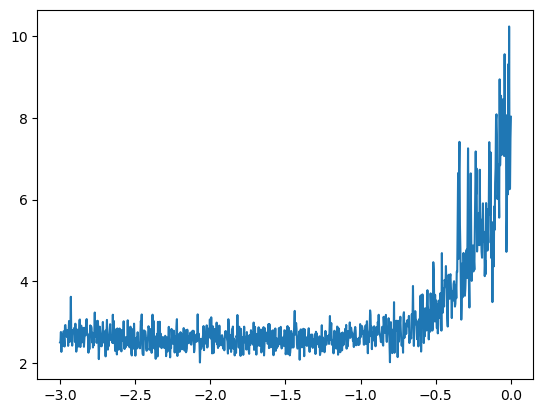

In [133]:
plt.plot(lri,lossi)

# The chart below shows that the learning rate exponent of about -1.0 is pretty good
# This gives the ideal learning rate as 0.1

In [134]:
# Read the full data set and optimize the neural network

# Build the dataset

block_size = 3     # Context Length: How many previous characters do we use to predict the next one?
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
        # print(''.join(itos[i] for i in context), '----->', itos[idx])
        context = context[1:] + [idx]     # Crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [135]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [136]:
for p in parameters:
    p.requires_grad = True

In [143]:
# Set up training of the neural network
eta = 0.1

for i in range(10000):
    
    # Construct minibatch
    idx = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[idx])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

print(loss.item())

2.3432881832122803


In [144]:
# Calculate the loss for the entire dataset
emb = C[X] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.412095546722412


In [145]:
# Note that 2.28 is better than the loss on the bigram model that we achieved

In [146]:
# Split the data into training, validation, test (typically 80%, 10%, and 10% respectively)
# Training split is used to train the model
# Validation split is used to optimize hyper-parameters
# Test split is only used to finally evaluate the model

In [147]:
# Set up the network parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [148]:
for p in parameters:
    p.requires_grad = True

In [149]:
# Build the dataset

def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            idx = stoi[ch]
            X.append(context)
            Y.append(idx)
            context = context[1:] + [idx] # crop and append
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtrg, Ytrg = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xtst, Ytst = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [150]:
# Set up training of the neural network
eta = 0.1
# eta = 0.01

for i in range(10000):
    
    # Construct minibatch
    idx = torch.randint(0, Xtrg.shape[0], (32,))

    # Forward pass
    emb = C[Xtrg[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytrg[idx])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

print(loss.item())

2.562039613723755


In [151]:
# Evaluate loss on validation set
emb = C[Xval] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yval)
print(loss.item())

2.511012315750122


In [152]:
# Now increase the size of the neural network
# Easiest way is to scale up the number of neurons in the hidden layer

# Set up the network parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [153]:
for p in parameters:
    p.requires_grad = True

In [154]:
sum(p.nelement() for p in parameters) # Number of parameters

10281

In [155]:
# Set up training of the neural network
#eta = 0.1
# eta = 0.05
eta = 0.01

# Keep track of the stats
lri = []
lossi = []
stepi = []

for i in range(30000):
    
    # Construct minibatch
    idx = torch.randint(0, Xtrg.shape[0], (32,))

    # Forward pass
    emb = C[Xtrg[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytrg[idx])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad
        
    stepi.append(i)
    lossi.append(loss.item())

# print(loss.item())

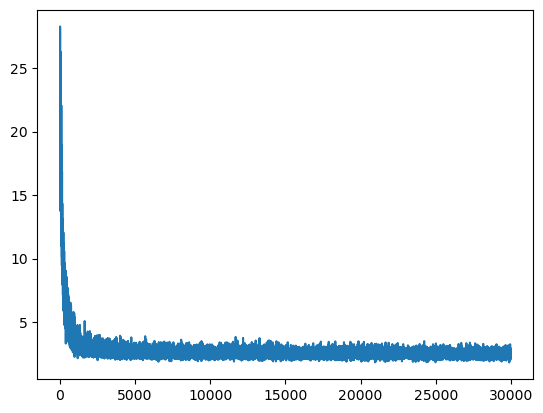

In [156]:
# Plot Steps against the Loss
plt.plot(stepi, lossi)

In [157]:
# Evaluate loss on training set
emb = C[Xtrg] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytrg)
print(loss.item())

2.4737401008605957


In [158]:
# Evaluate loss on validation set
emb = C[Xval] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yval)
print(loss.item())

2.472062826156616


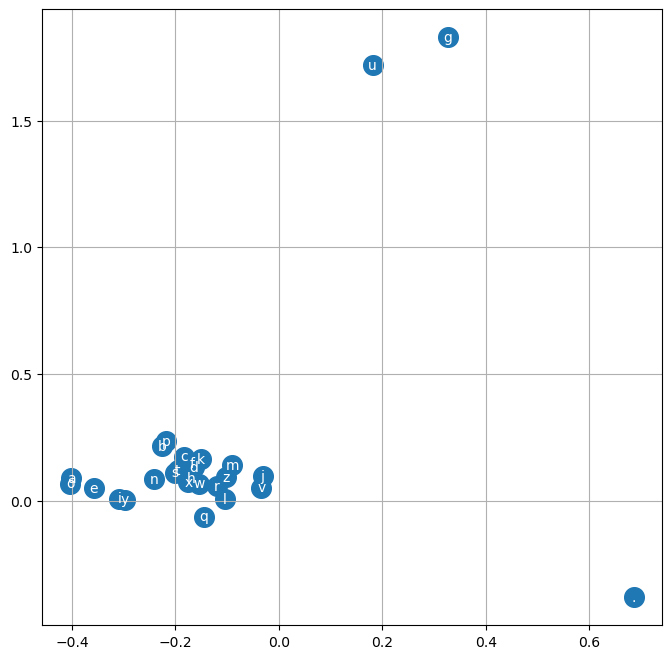

In [159]:
# Visualize the character embeddings - 2 dimensional
# Hypothesis: Is this a bottleneck for the network performance

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [160]:
# Now increase the embedding size to 10 (from 2 dimensions)
# Decrease the hidden layer size to 200

# Set up the network parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]


# 1:07:00

In [161]:
for p in parameters:
    p.requires_grad = True

In [162]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [163]:
lri = []
lossi = []
stepi = []

In [188]:
for i in range(200000):
    
    # Construct minibatch
    idx = torch.randint(0, Xtrg.shape[0], (32,))

    # Forward pass
    emb = C[Xtrg[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytrg[idx])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Change learning rate as epochs progress
    eta = 0.1 if i < 100000 else 0.01

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad
        
    stepi.append(i)
    lossi.append(loss.log10().item())

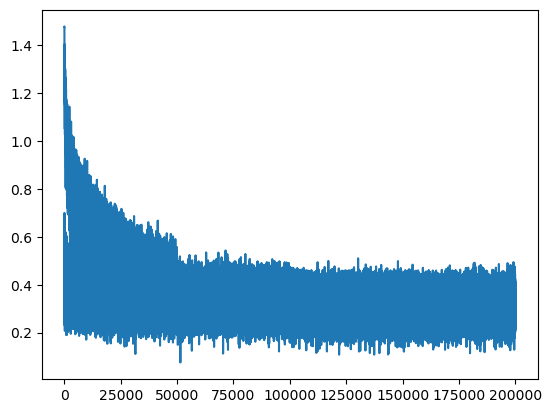

In [189]:
plt.plot(stepi, lossi)

In [190]:
# Evaluate loss on training set
emb = C[Xtrg] #(32, 3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytrg)
print(loss.item())

2.073206901550293


In [191]:
# Evaluate loss on validation set
emb = C[Xval] #(32, 3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yval)
print(loss.item())

2.127171754837036


In [194]:
# Sample from the model

g = torch.Generator().manual_seed(2147483647 * 10)

for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]    # (1, block_size, d)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        idx = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [idx]
        out.append(idx)
        if idx == 0:
            break
    print(''.join(itos[i] for i in out))
    



ael.
saahee.
daliba.
luzeannielia.
julio.
lie.
anmarr.
rayvid.
demyla.
karicia.
dacarlin.
ana.
zaylynn.
shayluan.
dayannahsa.
tellam.
raydanoreighaciah.
anney.
karveleya.
grachilian.
